<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-murasakiw/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones

Nombre: Sergio Omar Esparza Hernández  
Matrícula: A01794338  
Materia: Ciencia y Analítica de Datos  
Profesor: María de la Paz Rico Fernández  
Fecha: 27/10/2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [ ]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(np.dot(W, D), Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [ ]:
#Matriz 1
A1 = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(A1)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A1)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A1)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.around(np.dot(np.dot(W, D), Winv)) #Se redondean los resultados para que la comparación visual sea más sencilla
B = B.real #Se obtienen solamente las partes reales de los números, ya que las partes imaginarias son prácticamente 0
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------


In [ ]:
#Matriz 2
A2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(A2)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A2)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A2)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.around(np.dot(np.dot(W, D), Winv))
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [ ]:
#Matriz 3
A3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(A3)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A3)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A3)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.round(np.dot(np.dot(W, D), Winv)) #Se redondean los resultados para que la comparación visual sea más sencilla
B[B==0] = 0 #Código para eliminar los ceros con símbolo negativo
print(B)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4.  0.]
 [ 1.  0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


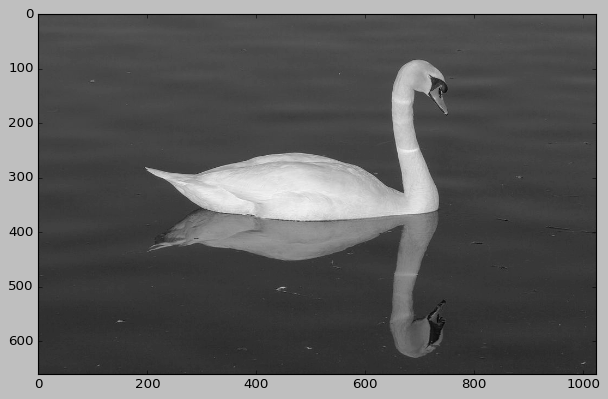

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FE93F1E5790>


In [ ]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [ ]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [ ]:
U.shape

(660, 660)

In [ ]:
V.shape

(1024, 1024)

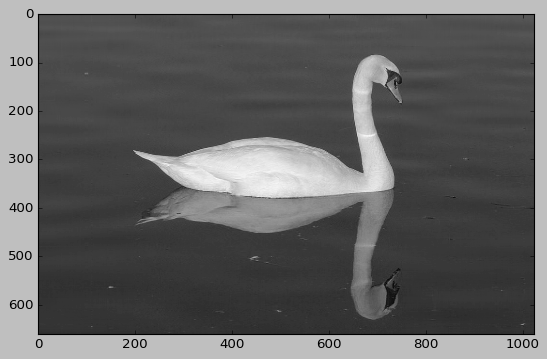

Felicidades la imagen está comprimida


In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 150
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

[187. 187. 189. ... 188. 188. 191.]
(486, 729)
(486, 486)
(729, 729)


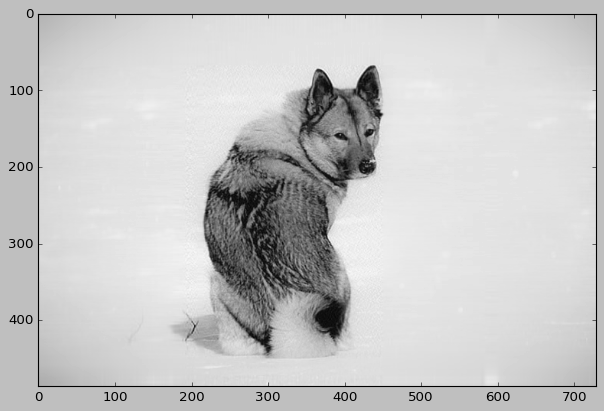

Felicidades la imagen está comprimida


In [ ]:
#imagen 1
plt.style.use('classic')
img_1 = Image.open(urllib.request.urlopen('https://www.akc.org/wp-content/uploads/2017/11/Norwegian-Elkhound-sitting-in-the-snow-looking-back-over-its-shoulder.jpg')).convert('LA')
imggray_1 = img_1.convert('LA')
imgmat_1 = np.array(list(imggray_1.getdata(band=0)),float)

print(imgmat_1)

imgmat_1.shape = (imggray_1.size[1],imggray_1.size[0])

plt.figure(figsize=(9,6))

U,D,V = np.linalg.svd(imgmat_1)
print(imgmat_1.shape)
print(U.shape)
print(V.shape)
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[132.  92.  62. ...  39.  39.  39.]
(533, 800)
(533, 533)
(800, 800)


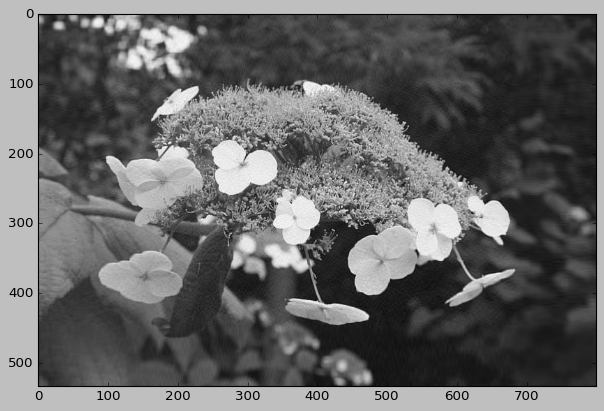

Felicidades la imagen está comprimida


In [ ]:
#imagen 2
plt.style.use('classic')
img_2 = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Hydrangea-aspera-zoo-cgn-07074-mutante.jpg/800px-Hydrangea-aspera-zoo-cgn-07074-mutante.jpg')).convert('LA')
imggray_2 = img_2.convert('LA')
imgmat_2 = np.array(list(imggray_2.getdata(band=0)),float)

print(imgmat_2)

imgmat_2.shape = (imggray_2.size[1],imggray_2.size[0])

plt.figure(figsize=(9,6))

U,D,V = np.linalg.svd(imgmat_2)
print(imgmat_2.shape)
print(U.shape)
print(V.shape)
nvalue = 150
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

[147. 154. 163. ...  49.  49.  50.]
(1536, 2048)
(1536, 1536)
(2048, 2048)


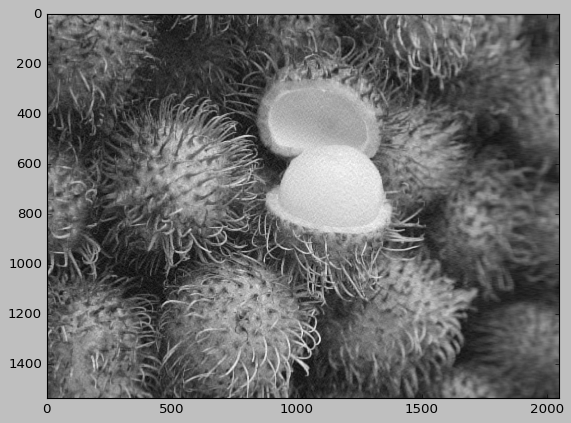

Felicidades la imagen está comprimida


In [ ]:
#imagen 3
plt.style.use('classic')
img_3 = Image.open(urllib.request.urlopen('https://media.cntraveler.com/photos/546976f2cbbd2620680d9f2f/master/pass/rare-fruits-tout.jpg')).convert('LA')
imggray_3 = img_3.convert('LA')
imgmat_3 = np.array(list(imggray_3.getdata(band=0)),float)

print(imgmat_3)

imgmat_3.shape = (imggray_3.size[1],imggray_3.size[0])

plt.figure(figsize=(9,6))

U,D,V = np.linalg.svd(imgmat_3)
print(imgmat_3.shape)
print(U.shape)
print(V.shape)
nvalue = 125
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])

plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [ ]:
#tu codigo aqui
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

#Cargar datos
iris = datasets.load_iris()
X = iris.data
y = iris.target

#Escalar variables con z-score
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#Modelo de PCA
pca = PCA(n_components = 2) #Estimar solo 2 componentes
X_new = pca.fit_transform(X) #Proyecta los datos orginales en el espacio PCA

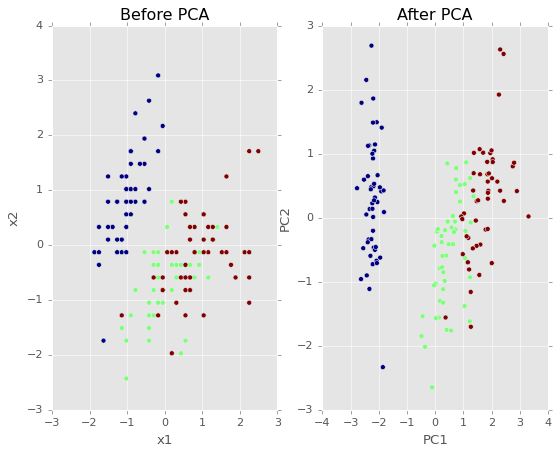

In [ ]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y) #Grafica solamente las variables longitud del sépalo y ancho del sépalo
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')

axes[1].scatter(X_new[:,0], X_new[:,1], c=y) #Grafica los datos originales proyectados en la dirección de las dos componentes principales definidas
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')

plt.show()

In [ ]:
print(pca.explained_variance_ratio_) #La proporción de la varianza explicada por cada componente principal

[0.72962445 0.22850762]


In [ ]:
np.cov(X_new.T) #Matriz de covarianza de los datos originales proyectados a lo largo de las componentes principales

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [ ]:
pca.explained_variance_ #La varianza explicada es igual a la diagonal principal de la matriz de covarianza de los datos originales proyectados a lo largo de las componentes principales

array([2.93808505, 0.9201649 ])

In [ ]:
#La importancia de cada variable es reflejada por la magnitud de los valores de los eigenvectores correspondientes
print(abs(pca.components_)) #Tiene forma n_componentes x n_variables
#Los valores absolutos de los componentes de los eigenvectores indican cuánto contribuye una variable al componente principal
#Mientras más grande el valor, mayor es la contribución

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [ ]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

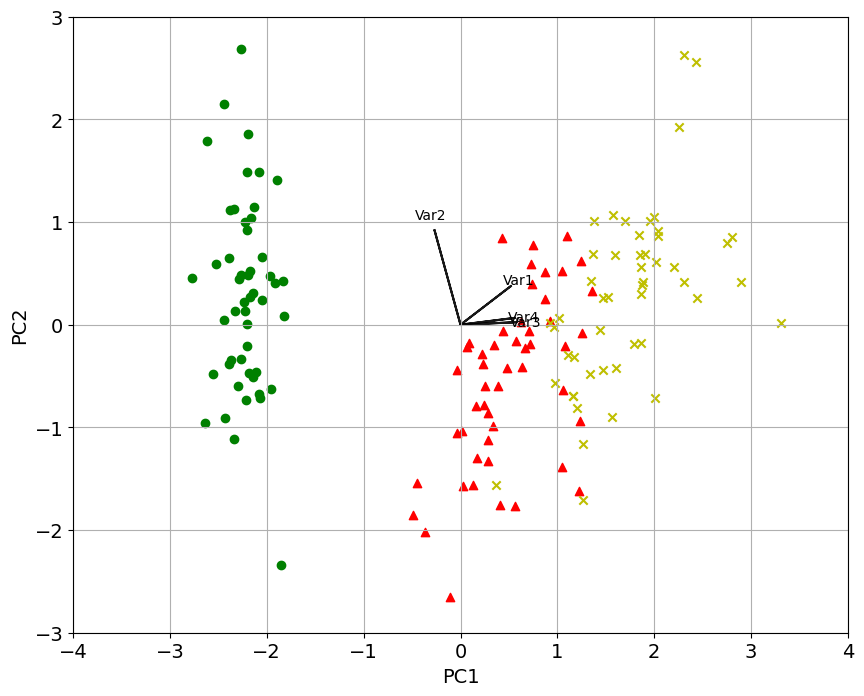

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [ ]:
# Las variables 3 y 4 están sumamente correlacionadas positivamente
np.corrcoef(X[:,2], X[:,3])[1,0]

0.9628654314027957

In [ ]:
# Las variables 2 y 3 están correlacionadas negativamente
np.corrcoef(X[:,1], X[:,2])[1,0]

-0.42844010433054014

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Lo relevante del ejercicio es que muestra claramente las partes principales de la reducción de dimensionalidad mediante el proceso de PCA. Es importante conocer las bases matemáticas de esto para saber cómo interpretar los resultados obtenidos utilizando la librería de scikit learn.

**Realiza un comentario relacionado a los pasos que se llevaron a cabo en este 
proceso de features importances.**

En la primera parte de este proceso, es importante escalar los datos para que de esta manera todas las variables de entrada tengan el mismo peso al momento de encontrar los componentes principales. Posteriormente, es necesario analizar la proporción de varianza explicada por cada uno de los componentes para asegurar que se obtiene un porcentaje alto de la variabilidad de los datos con los componentes principales. Estos son los pasos que considero más importantes, ya que estos son fundamentales para obtener todos los beneficios del proceso de PCA.

**¿Qué es feature importance y para que nos sirve?**

Feature importance es una magnitud que indica la importancia que tiene cada variable de entrada en la dirección de cada una de las componentes principales. Sirve para identificar cuáles variables de entrada aportan la mayor información y con base en esto se puede reducir la dimensionalidad de los datos cuando se tienen demasiadas variables de entrada.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**  

Que los valores de los eigenvectores indican qué variable aporta más a cada uno de los componentes principales. Que el número de componentes principales está limitado por el rango de la matriz de covarianza. Que las variables que más contribuyen a un componente principal están altamente correlacionadas positivamente, y que la correlación entre una variable que contribuye mucho y una que no contribuye tanto, es baja y negativa.   
Me parecieron muy útiles los ejemplos con las imágenes, en estos casos resulta muy evidente cómo afecta la variabilidad en la representación de los datos.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**  

Este conocimiento lo aplicaría para ayudar con la visualización de los datos, en casos en los que tres componentes principales sean suficientes para explicar un buen porcentaje de la varianza de los datos.    
Por otro lado, también este tipo de técnicas se pueden emplear para atender el problema llamado "curse of dimensionality", en el que resulta complicado encontrar una solución adecuada al problema debido a la gran cantidad de variables de entrada.   
Estas técnicas pueden ayudar a disminuir el tiempo de implementación de los modelos al reducir la cantidad de variables de entrada, pues se procesan menos datos.    
En el caso del SVD, esta técnica puede ser útil para almacenar imágenes sin que se pierda gran cantidad de la información que representan. Las imágenes pueden contener demasiados datos, pero con el método SVD se pueden comprimir para agilizar el procesamiento de estas.
